# First Steps
- Visualizate images
- Split on Train / Test

## Visualization

In [1]:
from os import path 

data_folder = "data"
colon = path.join(data_folder, "colon_image_sets")
lung = path.join(data_folder, "lung_image_sets")

colon_no = path.join(colon, "colon_n")
colon_yes = path.join(colon, "colon_aca")

lung_yes = path.join(lung, "lung_aca") # https://en.wikipedia.org/wiki/Adenocarcinoma_of_the_lung
lung_no = path.join(lung, "lung_n")
lung_yes_2 = path.join(lung, "lung_scc") # https://en.wikipedia.org/wiki/Squamous-cell_carcinoma_of_the_lung


In [60]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

def plotImages(images_arr):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(imread(img))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

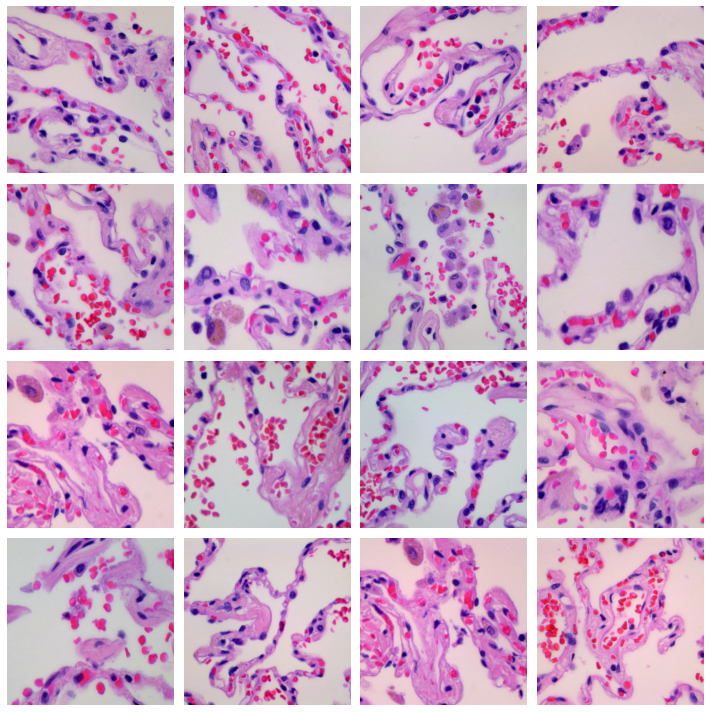

In [61]:
import glob
from random import sample
lung_no_files = glob.glob(path.join(lung_no,"*.jpeg"))

plotImages(sample(lung_no_files, 16))

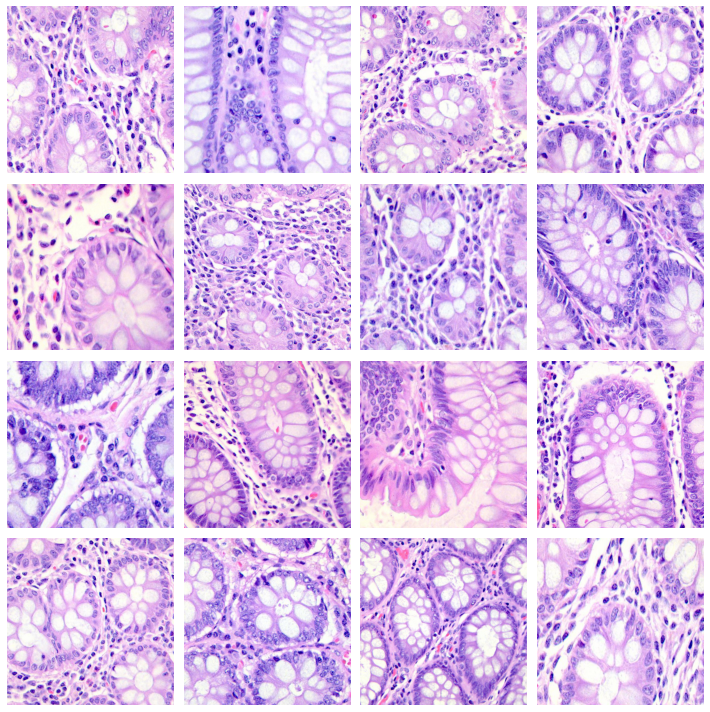

In [68]:
colon_no_files = glob.glob(path.join(colon_no,"*.jpeg"))

plotImages(sample(colon_no_files, 16))

## Split Train / Test

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split

images_paths = [colon_no, colon_yes, lung_yes, lung_no, lung_yes_2]

train = []
test = []

for images_path in images_paths:
    list_ = colon_no_files = glob.glob(path.join(images_path,"*.jpeg"))
    aux_list = []
    for image in list_:
        colon = True if "colon" in list_[0] else False
        non_cancer = True if "_n" in list_[0] else False
        aca_cancer = True if "_aca" in list_[0] else False
        aux_list.append((image, colon, non_cancer, aca_cancer))
    
    train_aux, test_aux = train_test_split(aux_list, train_size=0.8)
    
    train.extend(train_aux)
    test.extend(test_aux)

columns = ['filepath', 'is_colon', 'is_non_cancer', 'is_aca_cancer']
train_df = pd.DataFrame(train, columns = columns)
test_df = pd.DataFrame(test, columns = columns)

train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index = False)
    

In [92]:
len(train), len(test)

(20000, 5000)

In [93]:
train[0]

('data\\colon_image_sets\\colon_n\\colonn3867.jpeg', True, True, False)

In [94]:
train_df

,filepath,is_colon,is_non_cancer,is_aca_cancer
0,data\colon_image_sets\colon_n\colonn3867.jpeg,True,True,False
1,data\colon_image_sets\colon_n\colonn4609.jpeg,True,True,False
2,data\colon_image_sets\colon_n\colonn4692.jpeg,True,True,False
3,data\colon_image_sets\colon_n\colonn2022.jpeg,True,True,False
4,data\colon_image_sets\colon_n\colonn980.jpeg,True,True,False
...,...,...,...,...
19995,data\lung_image_sets\lung_scc\lungscc2245.jpeg,False,False,False
19996,data\lung_image_sets\lung_scc\lungscc3328.jpeg,False,False,False
19997,data\lung_image_sets\lung_scc\lungscc2775.jpeg,False,False,False
19998,data\lung_image_sets\lung_scc\lungscc408.jpeg,False,False,False
